**Analysis of Top GRN-genes**

The genes with the highest R². What is the GRN capturing?

In [1]:
import os
import sys

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
from scipy.sparse import csr_matrix

In [2]:
import celloracle as co
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [4]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [5]:
#load oracle object
oracle = co.load_hdf5("./Pancreas_grn_vel2.celloracle.oracle")

In [6]:
#load GRNs, which were saved in the Links obect
links = co.load_hdf5("./links.celloracle.links")

In [7]:
#filter based on the p-value 0.001 default
links.filter_links()

In [8]:
#extract TF and target gene info from links object
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)

## Top GRN genes

In [9]:
#fit GRN
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

fitting GRN again...
calculating GRN in Alpha


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 981 genes
calculating GRN in Beta


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 972 genes
calculating GRN in Delta


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 859 genes
calculating GRN in Ductal


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 819 genes
calculating GRN in Epsilon


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 770 genes
calculating GRN in Ngn3 high EP


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 951 genes
calculating GRN in Ngn3 low EP


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 799 genes
calculating GRN in Pre-endocrine


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 1013 genes


In [10]:
grn_scores_df = pd.DataFrame()
grn_genes_df = pd.DataFrame()
for clus in oracle.scores.keys():
    grn_genes_df[clus] = np.asarray(oracle.adata.var_names[np.argsort(-1*np.array(oracle.scores[clus]))])
    grn_scores_df[clus] = -1*np.sort(-1*np.array(oracle.scores[clus]))

In [11]:
oracle.adata.uns["rank_grn_genes"] = {}
oracle.adata.uns["rank_grn_genes"] = {
    "names": np.rec.fromarrays(
        [n for n in np.asarray(grn_genes_df.T)],
        dtype=[(f"{rn}", "U50") for rn in grn_genes_df.columns],
    ),
    "scores": np.rec.fromarrays(
        [n.round(2) for n in np.asarray(grn_scores_df.T)],
        dtype=[(f"{rn}", "float32") for rn in grn_genes_df.columns],
    ),
}

In [12]:
df = scv.get_df(oracle.adata, 'rank_grn_genes/names')
df.head(5)

Alpha     Beta    Delta  Ductal   Epsilon Ngn3 high EP Ngn3 low EP  \
0     Fev     Calr    Pcsk2  Tuba1b       Ttr         Spp1      Nucks1   
1   Ffar2     Nnat  Hsp90b1  Nucks1  BC023829          Vim      Tuba1b   
2  Nkx6-1      Fev   Nkx6-1   H2afz    Cdkn1a       Btbd17       Tubb5   
3     Vim     Ssr4     Arg1   Tubb5    Tmem27        Tubb3        Smc4   
4  Cryba2  Hsp90b1    Auts2    Smc4     Abcc8          Mdk       Lmnb1   

  Pre-endocrine  
0        Btbd17  
1           Mdk  
2          Selm  
3         Rap1b  
4           Cpe

saving figure to file ./figures/scvelo_Alpha_grn_best_fit_genes_spliced.png


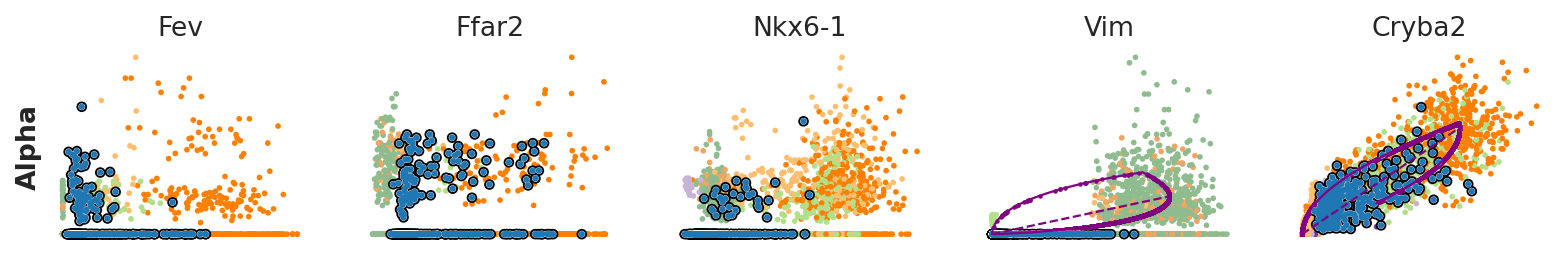

saving figure to file ./figures/scvelo_Beta_grn_best_fit_genes_spliced.png


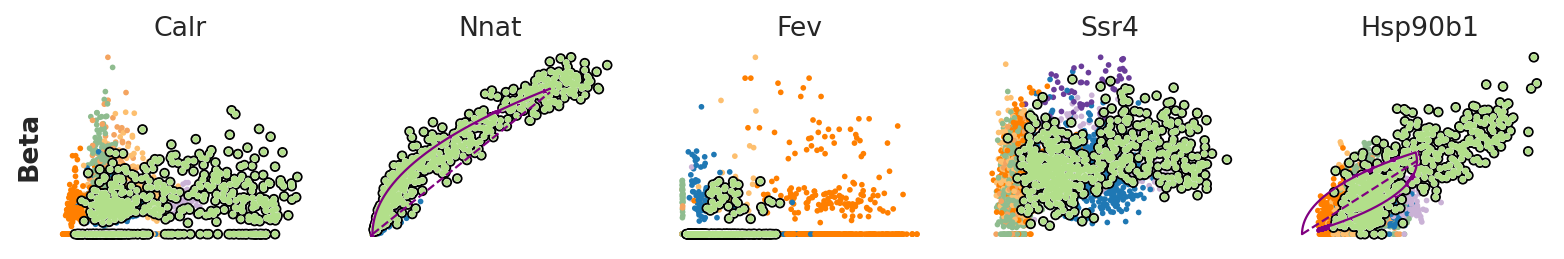

saving figure to file ./figures/scvelo_Delta_grn_best_fit_genes_spliced.png


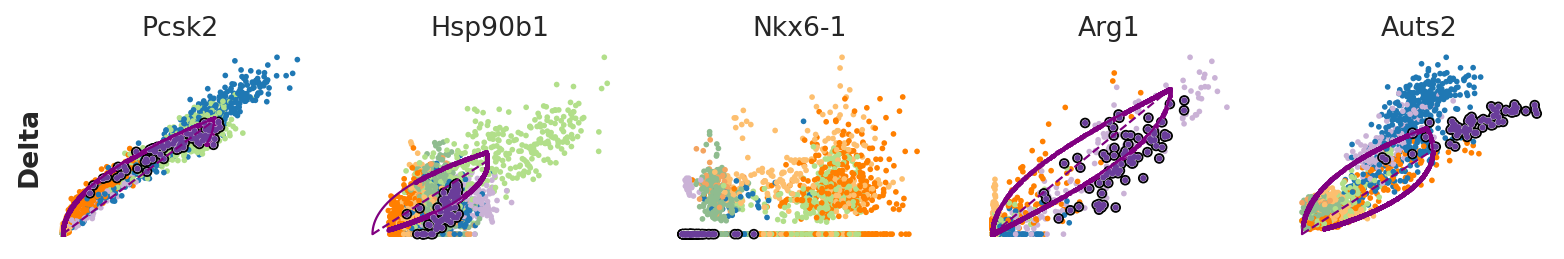

saving figure to file ./figures/scvelo_Ductal_grn_best_fit_genes_spliced.png


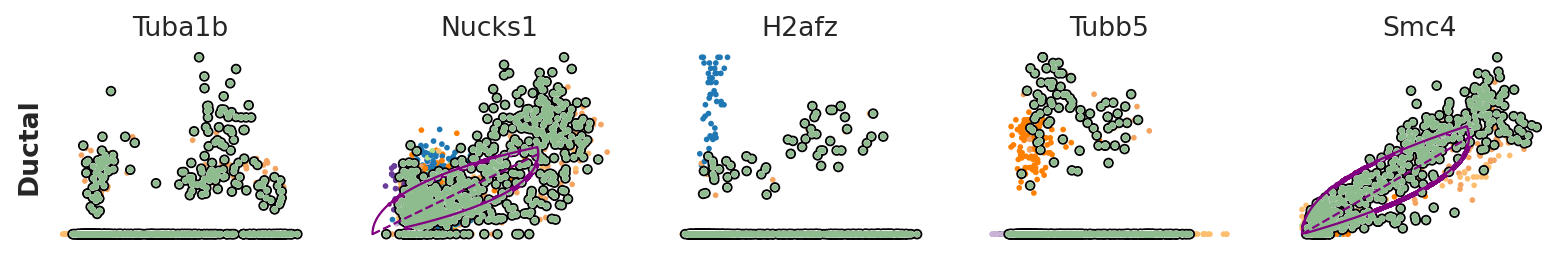

saving figure to file ./figures/scvelo_Epsilon_grn_best_fit_genes_spliced.png


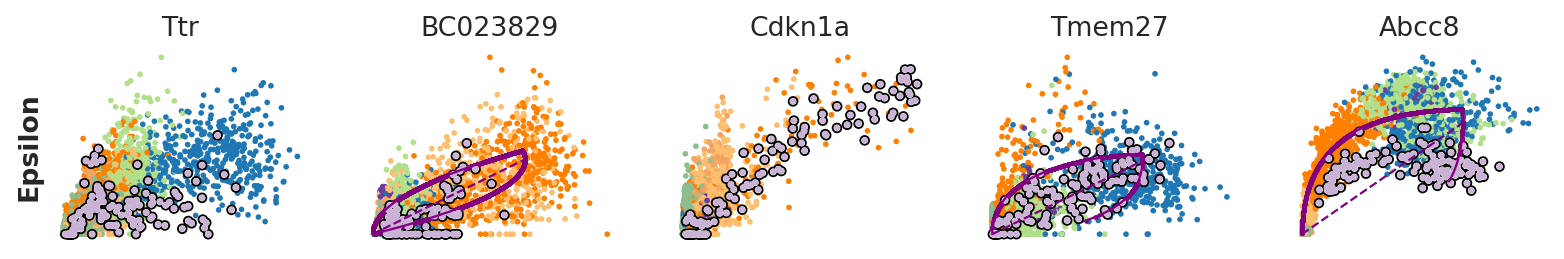

saving figure to file ./figures/scvelo_Ngn3 high EP_grn_best_fit_genes_spliced.png


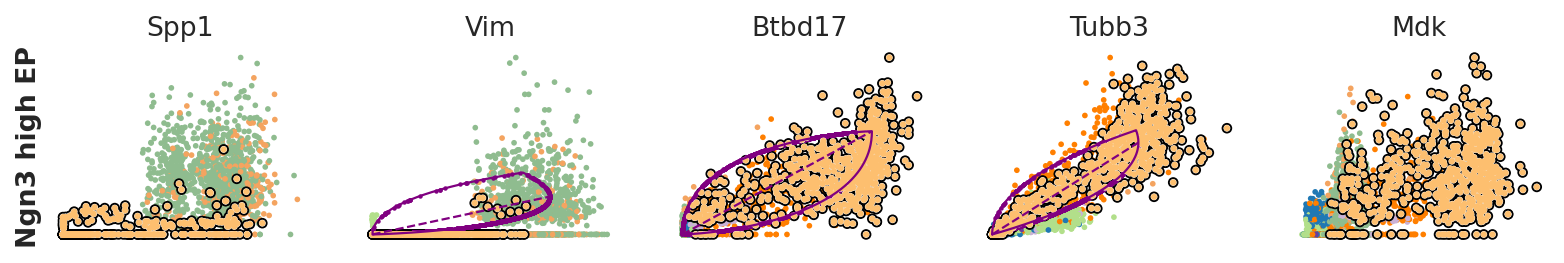

saving figure to file ./figures/scvelo_Ngn3 low EP_grn_best_fit_genes_spliced.png


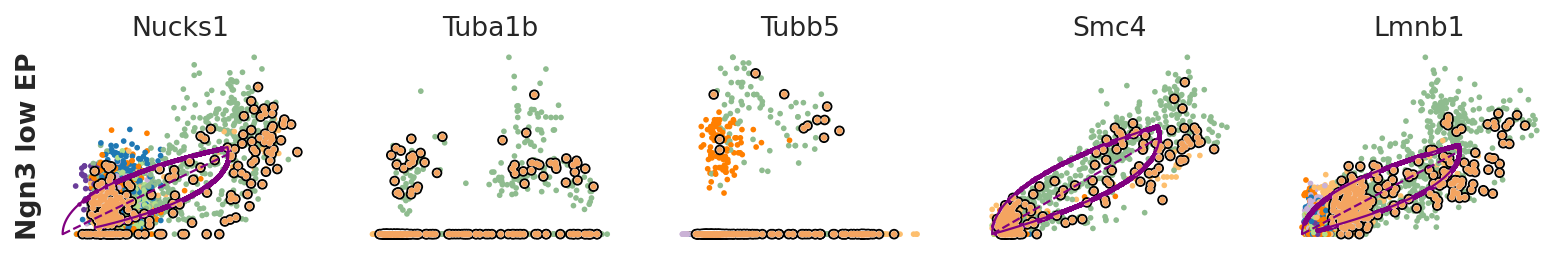

saving figure to file ./figures/scvelo_Pre-endocrine_grn_best_fit_genes_spliced.png


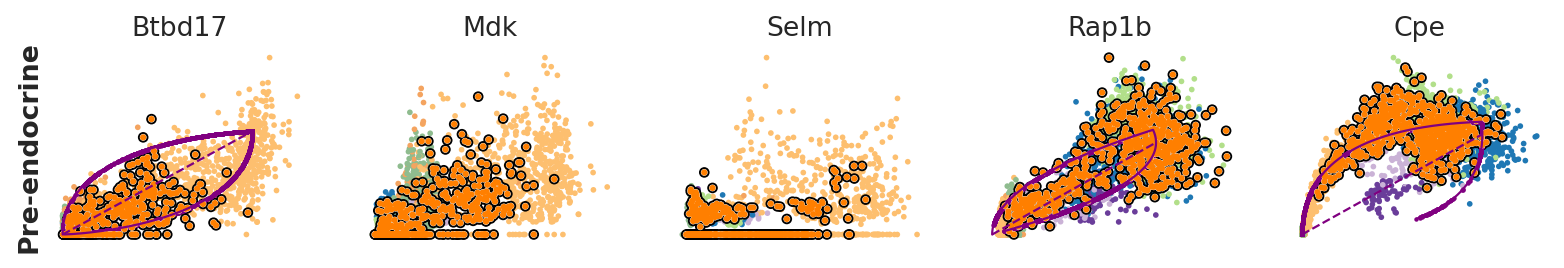

In [13]:
for col in df.columns:
    scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False, save=str(col)+'_grn_best_fit_genes_spliced.png')

saving figure to file ./figures/scvelo_Alpha_grn_best_fit_genes.png


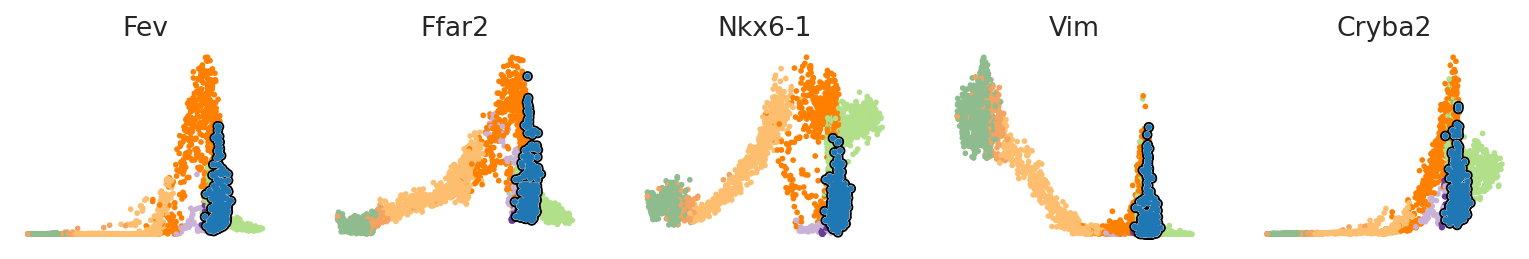

saving figure to file ./figures/scvelo_Beta_grn_best_fit_genes.png


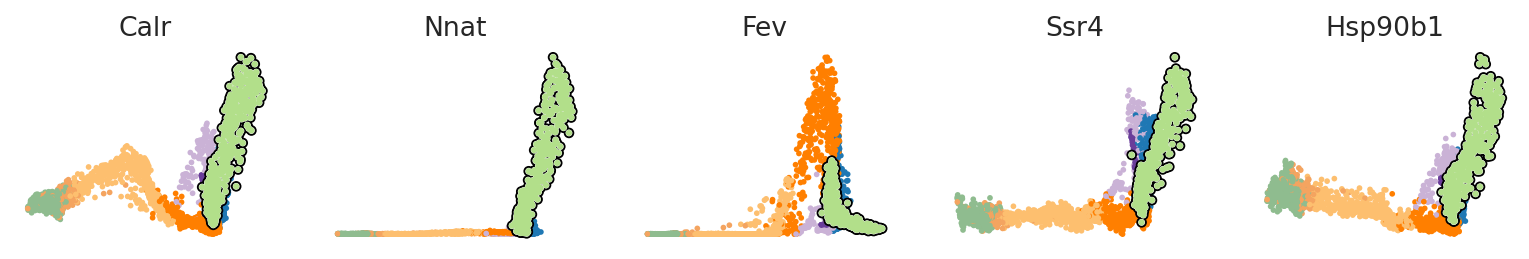

saving figure to file ./figures/scvelo_Delta_grn_best_fit_genes.png


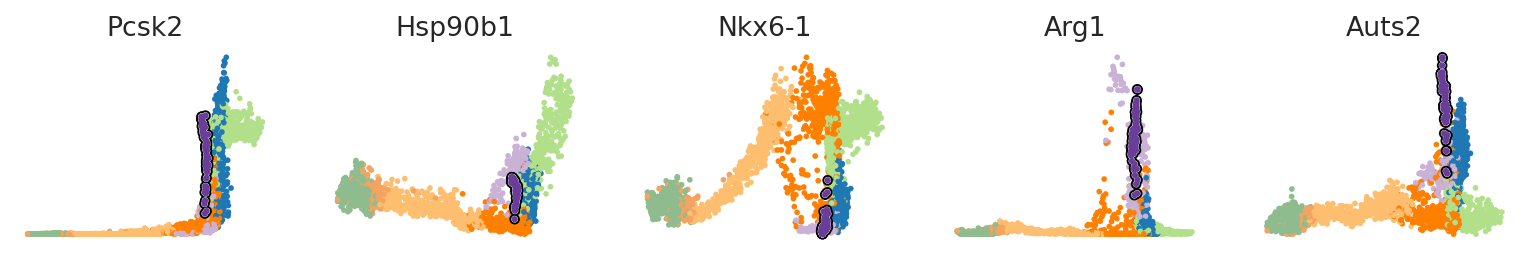

saving figure to file ./figures/scvelo_Ductal_grn_best_fit_genes.png


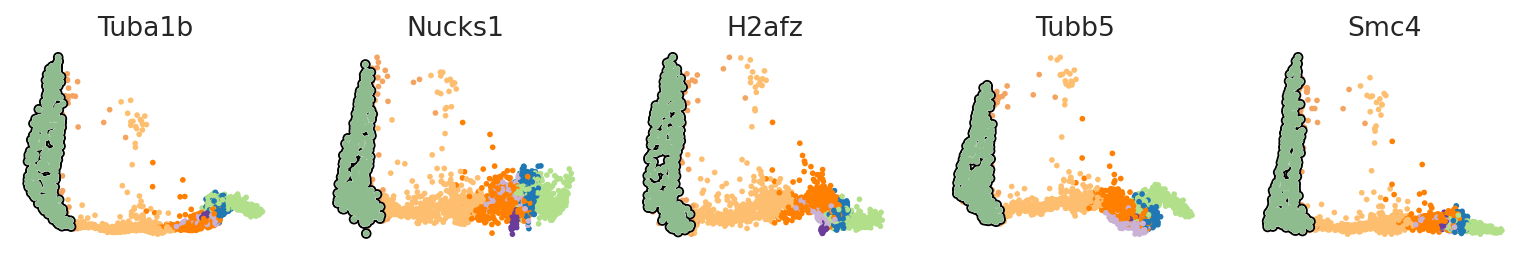

saving figure to file ./figures/scvelo_Epsilon_grn_best_fit_genes.png


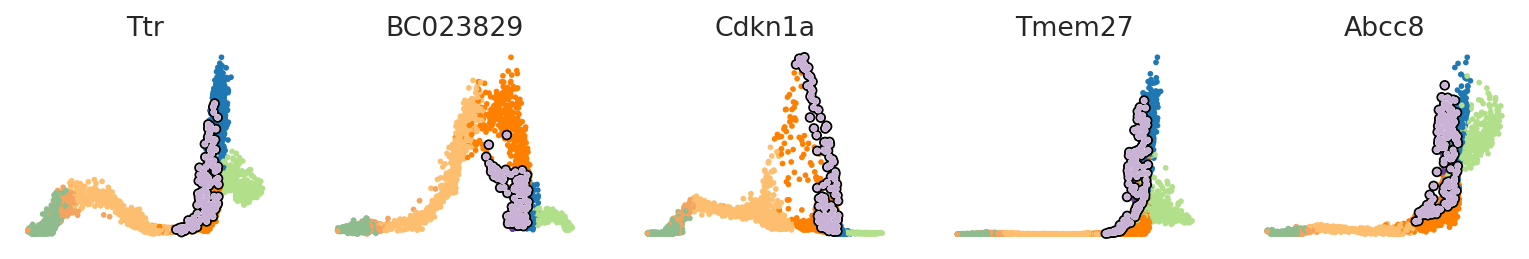

saving figure to file ./figures/scvelo_Ngn3 high EP_grn_best_fit_genes.png


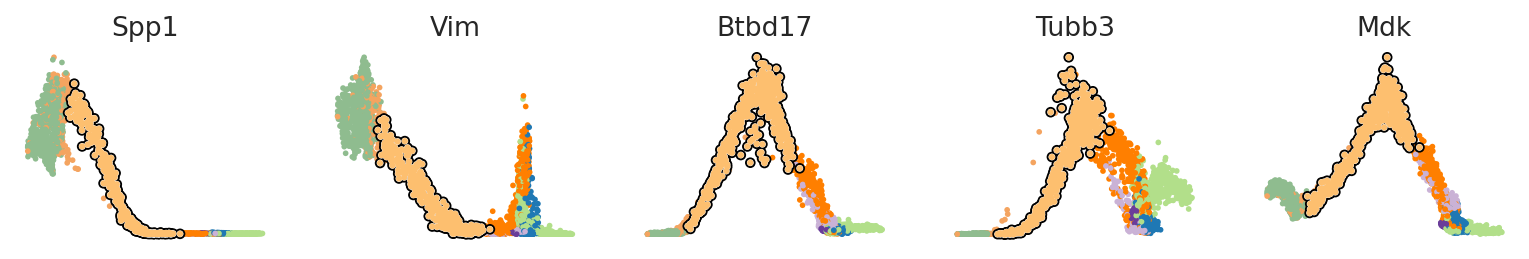

saving figure to file ./figures/scvelo_Ngn3 low EP_grn_best_fit_genes.png


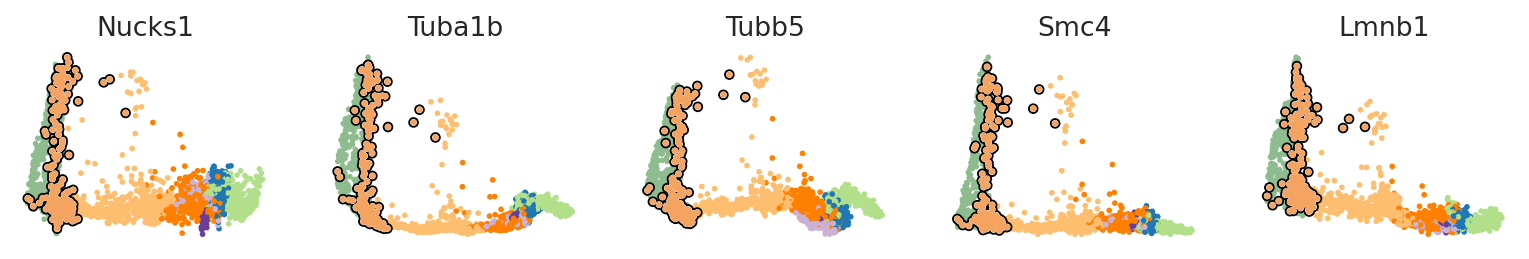

saving figure to file ./figures/scvelo_Pre-endocrine_grn_best_fit_genes.png


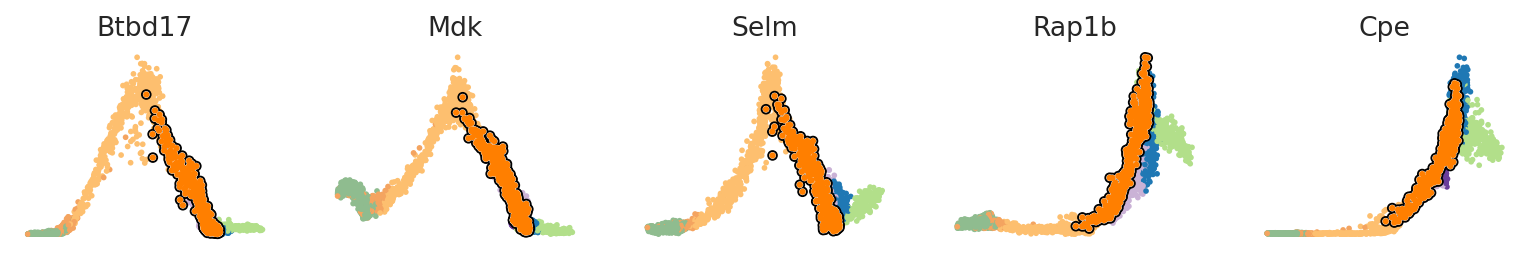

In [14]:
for col in df.columns:
    #scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False)
    scv.pl.scatter(oracle.adata, x='latent_time', y=list(df[col][:5]), add_outline = col, frameon=False, save=str(col)+'_grn_best_fit_genes.png')

## Top velocity genes

In [15]:
df = scv.get_df(oracle.adata, 'rank_dynamical_genes/names')
df.head(5)

Ductal Ngn3 low EP Ngn3 high EP Pre-endocrine     Beta  Alpha   Delta  \
0   Dcdc2a      Dcdc2a       Rbfox3         Abcc8    Pcsk2    Cpe   Pcsk2   
1    Top2a         Adk       Mapre3       Tmem163      Ank  Gnao1   Rap1b   
2     Nfib       Mki67       Btbd17         Gnao1  Tmem163   Pak3    Pak3   
3  Wfdc15b    Rap1gap2        Sulf2           Ank   Tspan7   Pim2   Abcc8   
4     Cdk1       Top2a        Tcp11        Tspan7    Map1b  Map1b  Klhl32   

    Epsilon  
0      Tox3  
1    Rnf130  
2     Meis2  
3       Adk  
4  Rap1gap2

saving figure to file ./figures/scvelo_Ductal_vel_best_fit_genes_spliced.png


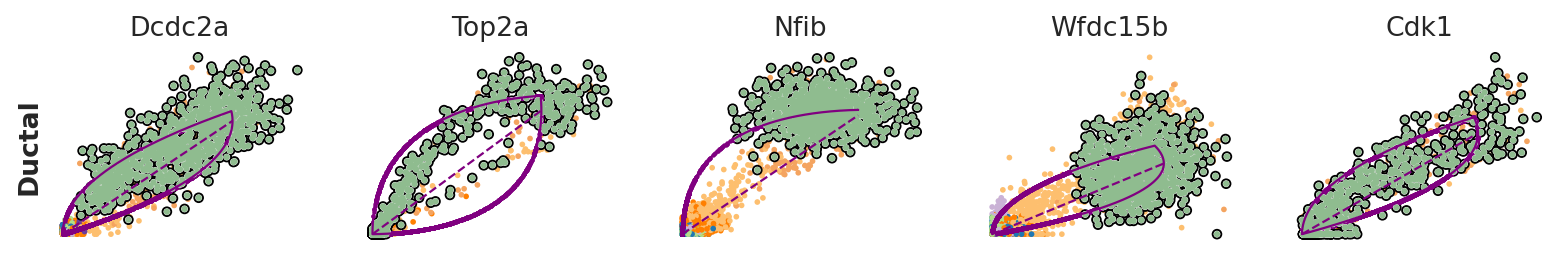

saving figure to file ./figures/scvelo_Ngn3 low EP_vel_best_fit_genes_spliced.png


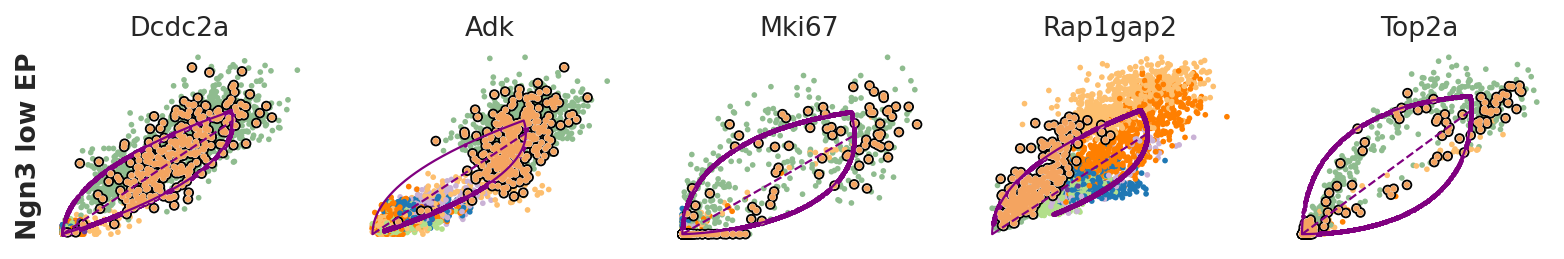

saving figure to file ./figures/scvelo_Ngn3 high EP_vel_best_fit_genes_spliced.png


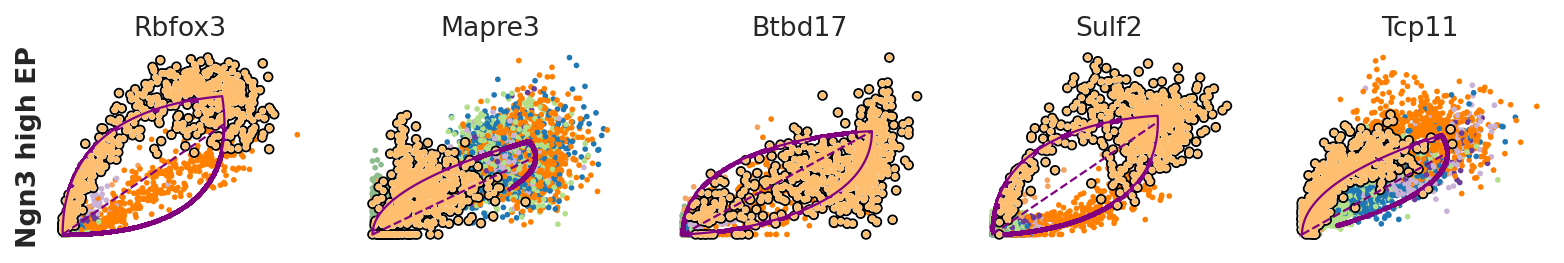

saving figure to file ./figures/scvelo_Pre-endocrine_vel_best_fit_genes_spliced.png


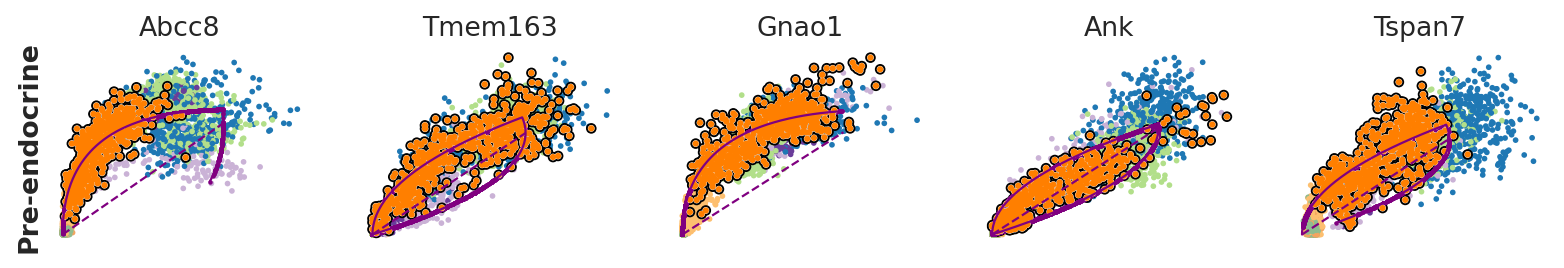

saving figure to file ./figures/scvelo_Beta_vel_best_fit_genes_spliced.png


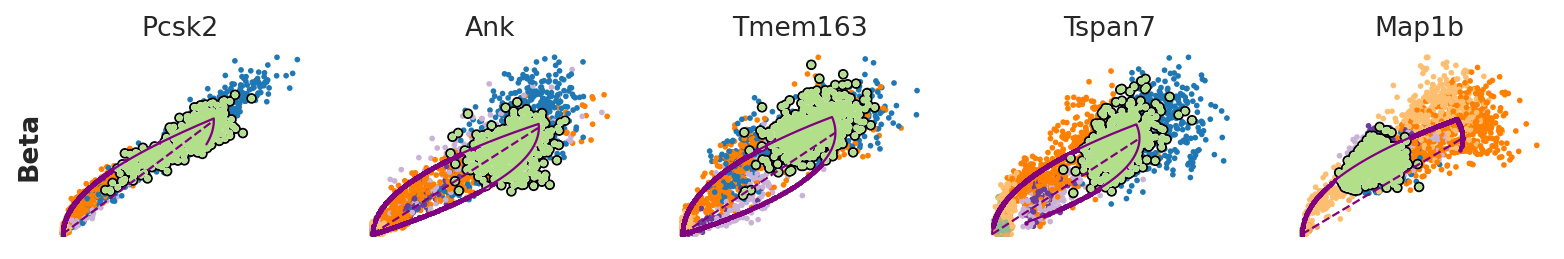

saving figure to file ./figures/scvelo_Alpha_vel_best_fit_genes_spliced.png


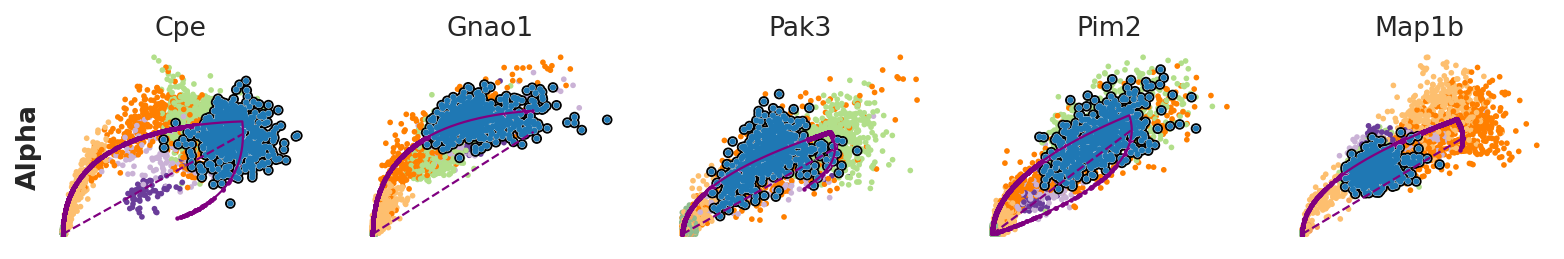

saving figure to file ./figures/scvelo_Delta_vel_best_fit_genes_spliced.png


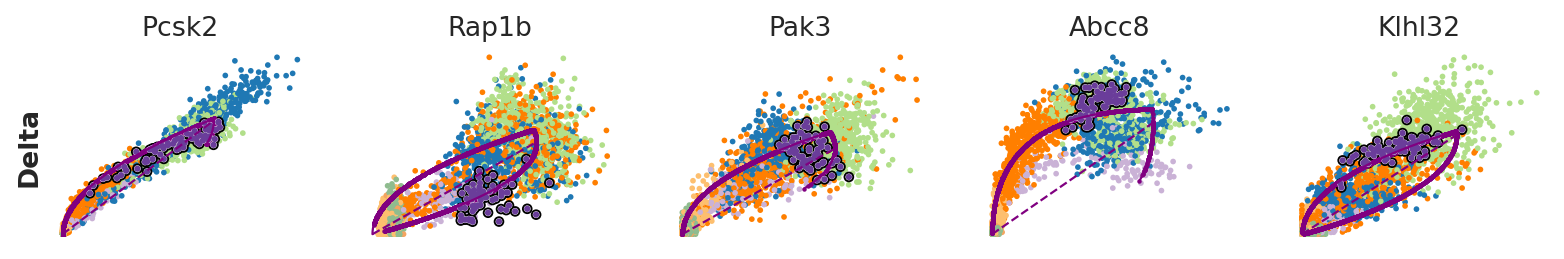

saving figure to file ./figures/scvelo_Epsilon_vel_best_fit_genes_spliced.png


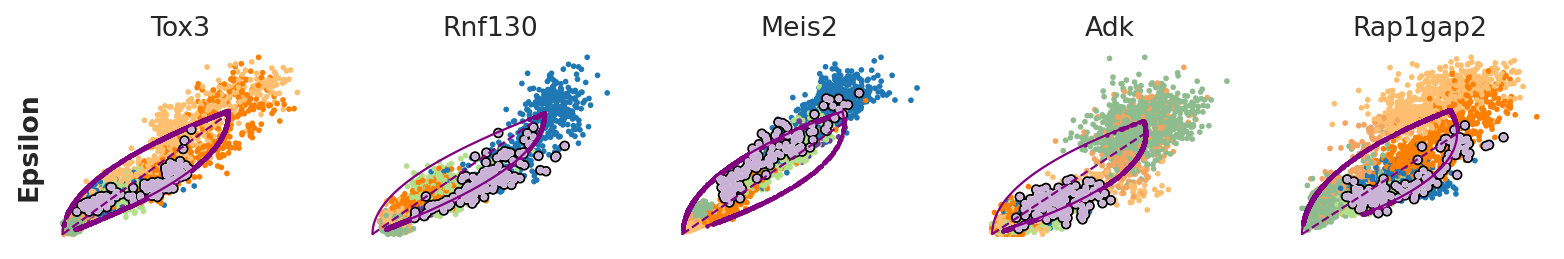

In [16]:
for col in df.columns:
    scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False, save=str(col)+'_vel_best_fit_genes_spliced.png')

saving figure to file ./figures/scvelo_Ductal_vel_best_fit_genes.png


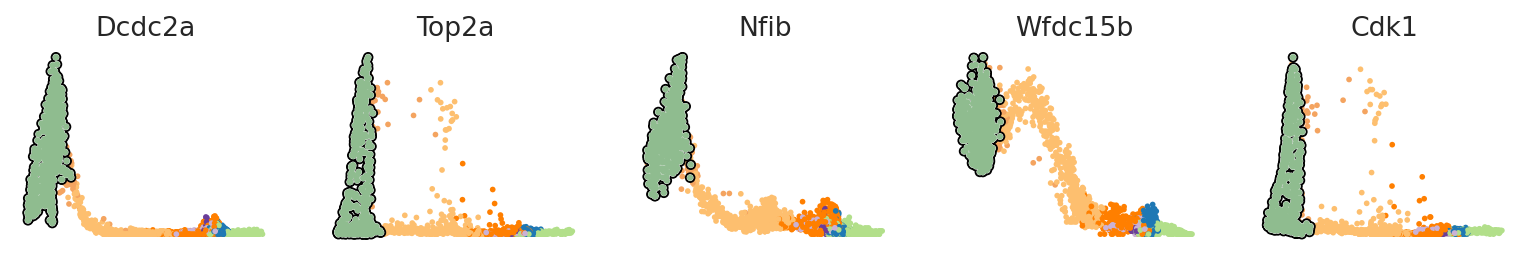

saving figure to file ./figures/scvelo_Ngn3 low EP_vel_best_fit_genes.png


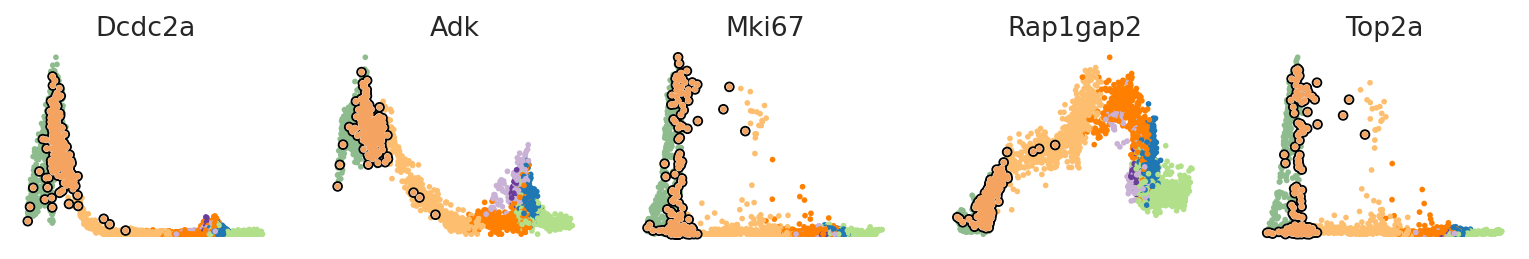

saving figure to file ./figures/scvelo_Ngn3 high EP_vel_best_fit_genes.png


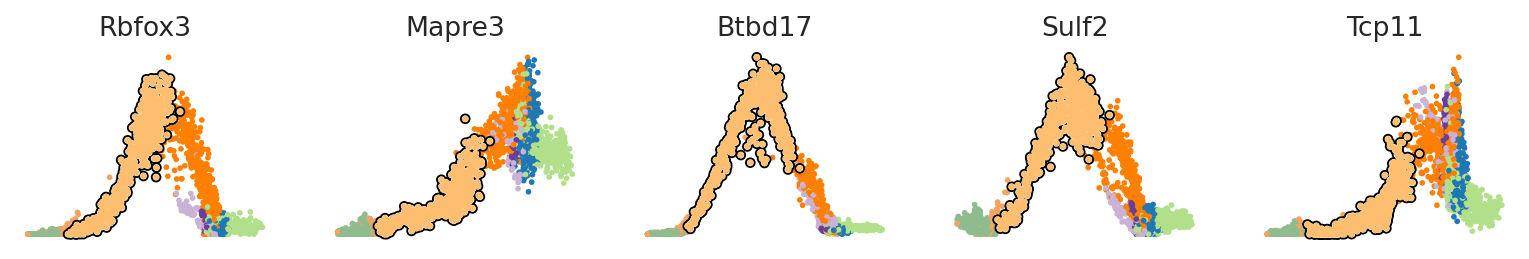

saving figure to file ./figures/scvelo_Pre-endocrine_vel_best_fit_genes.png


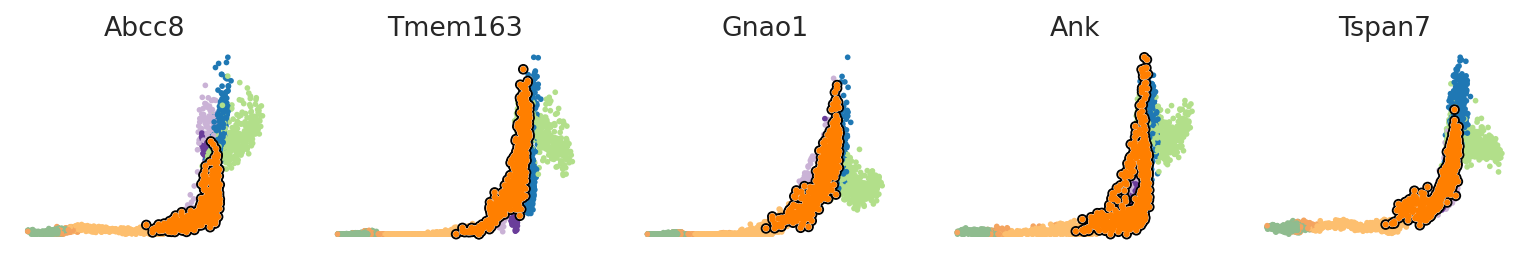

saving figure to file ./figures/scvelo_Beta_vel_best_fit_genes.png


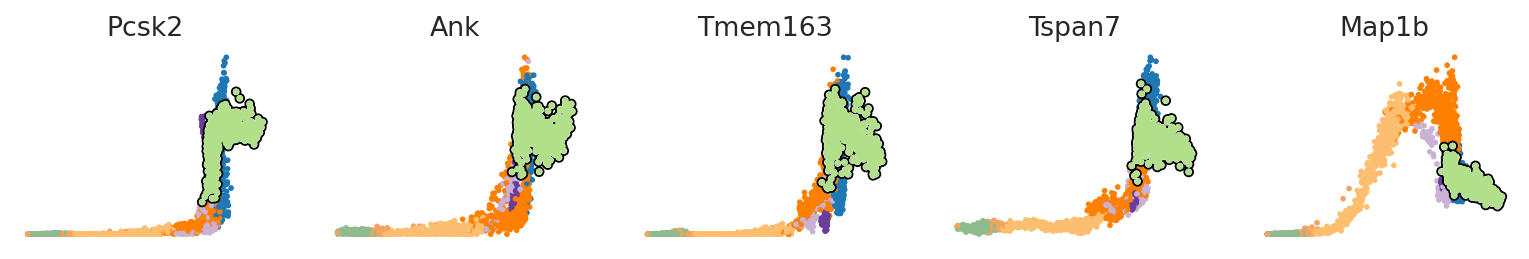

saving figure to file ./figures/scvelo_Alpha_vel_best_fit_genes.png


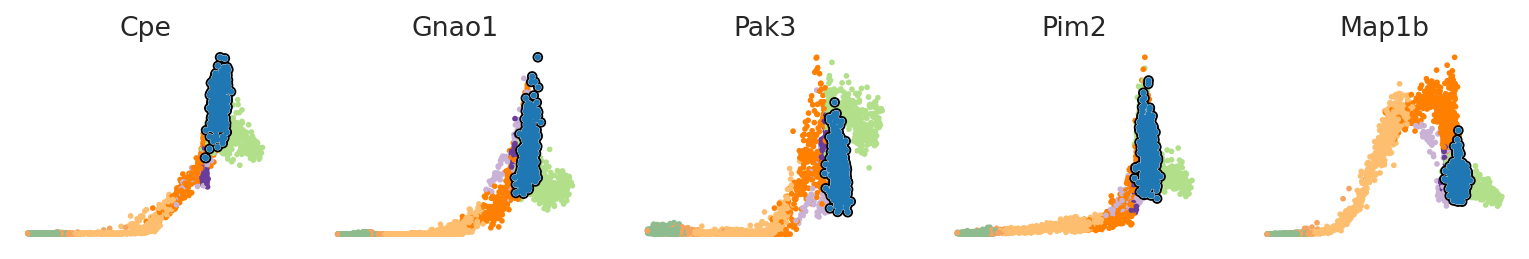

saving figure to file ./figures/scvelo_Delta_vel_best_fit_genes.png


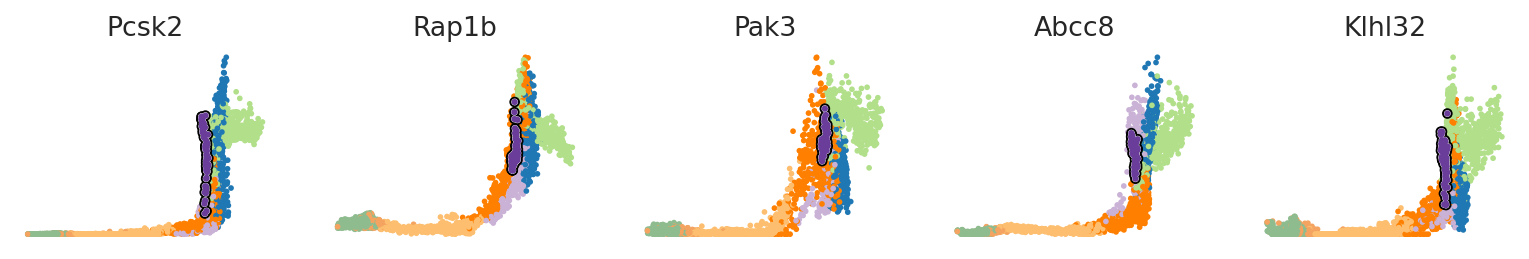

saving figure to file ./figures/scvelo_Epsilon_vel_best_fit_genes.png


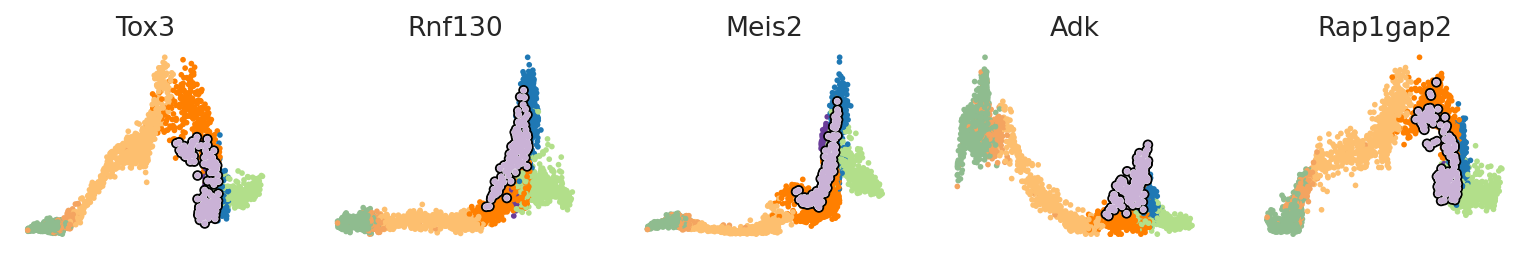

In [17]:
for col in df.columns:
    #scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False)
    scv.pl.scatter(oracle.adata, x='latent_time', y=list(df[col][:5]), add_outline = col, frameon=False, save=str(col)+'_vel_best_fit_genes.png')

## EXTRA: Plotting a GRN

In [18]:
import networkx as nx

In [19]:
dic={}
genes_up = {}
genes_down = {}

In [20]:
#coefficients of Ezh2
gen = 'Ezh2'

def add_to_dic(gen):
    df = pd.DataFrame(oracle.coef_matrix_per_cluster['Ductal'][gen][np.abs(oracle.coef_matrix_per_cluster['Ductal'][gen])>0]).reset_index()
    df['gene'] = gen
    df['abs'] = np.abs(df[gen])
    df['weight'] = df[gen]
    df = df.drop(gen, axis=1)
    df = df.round(2)
    up = np.quantile(df['weight'], 0.75)
    down = np.quantile(df['weight'], 0.25)
    genes_up = df[df['weight']>up]['index']
    genes_down = df[df['weight']<down]['index']
    return df, genes_up, genes_down

In [21]:
dic[gen], genes_up[gen], genes_down[gen] = add_to_dic(gen)

In [22]:
for g in genes_up[gen]:
    dic[g],_,_ = add_to_dic(g) 

In [23]:
for g in genes_down[gen]:
    dic[g],_,_ = add_to_dic(g) 

In [24]:
all_dfs = pd.concat([dic[n] for n in dic.keys()], ignore_index=True)

In [25]:
all_dfs.head(5)

index  gene   abs  weight
0    Dtl  Ezh2  0.17    0.17
1  Esrrg  Ezh2  0.00    0.00
2  Hmga2  Ezh2  0.11    0.11
3  Ikzf4  Ezh2  0.01   -0.01
4  Traf4  Ezh2  0.02    0.02

In [26]:
all_dfs_pruned = all_dfs[all_dfs['weight']>np.quantile(all_dfs['weight'], 0.25)][all_dfs['weight']<np.quantile(all_dfs['weight'], 0.75)]

In [27]:
TFs = all_dfs_pruned[all_dfs_pruned['gene']=='Ezh2']['index']

In [28]:
DG = nx.DiGraph()
colors = []
for u in np.array(all_dfs_pruned):
    DG.add_edge(u[0], u[1], weight=u[3])
    if u[3]<0:
        colors.append(0.7)
    else:
        colors.append(0.2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


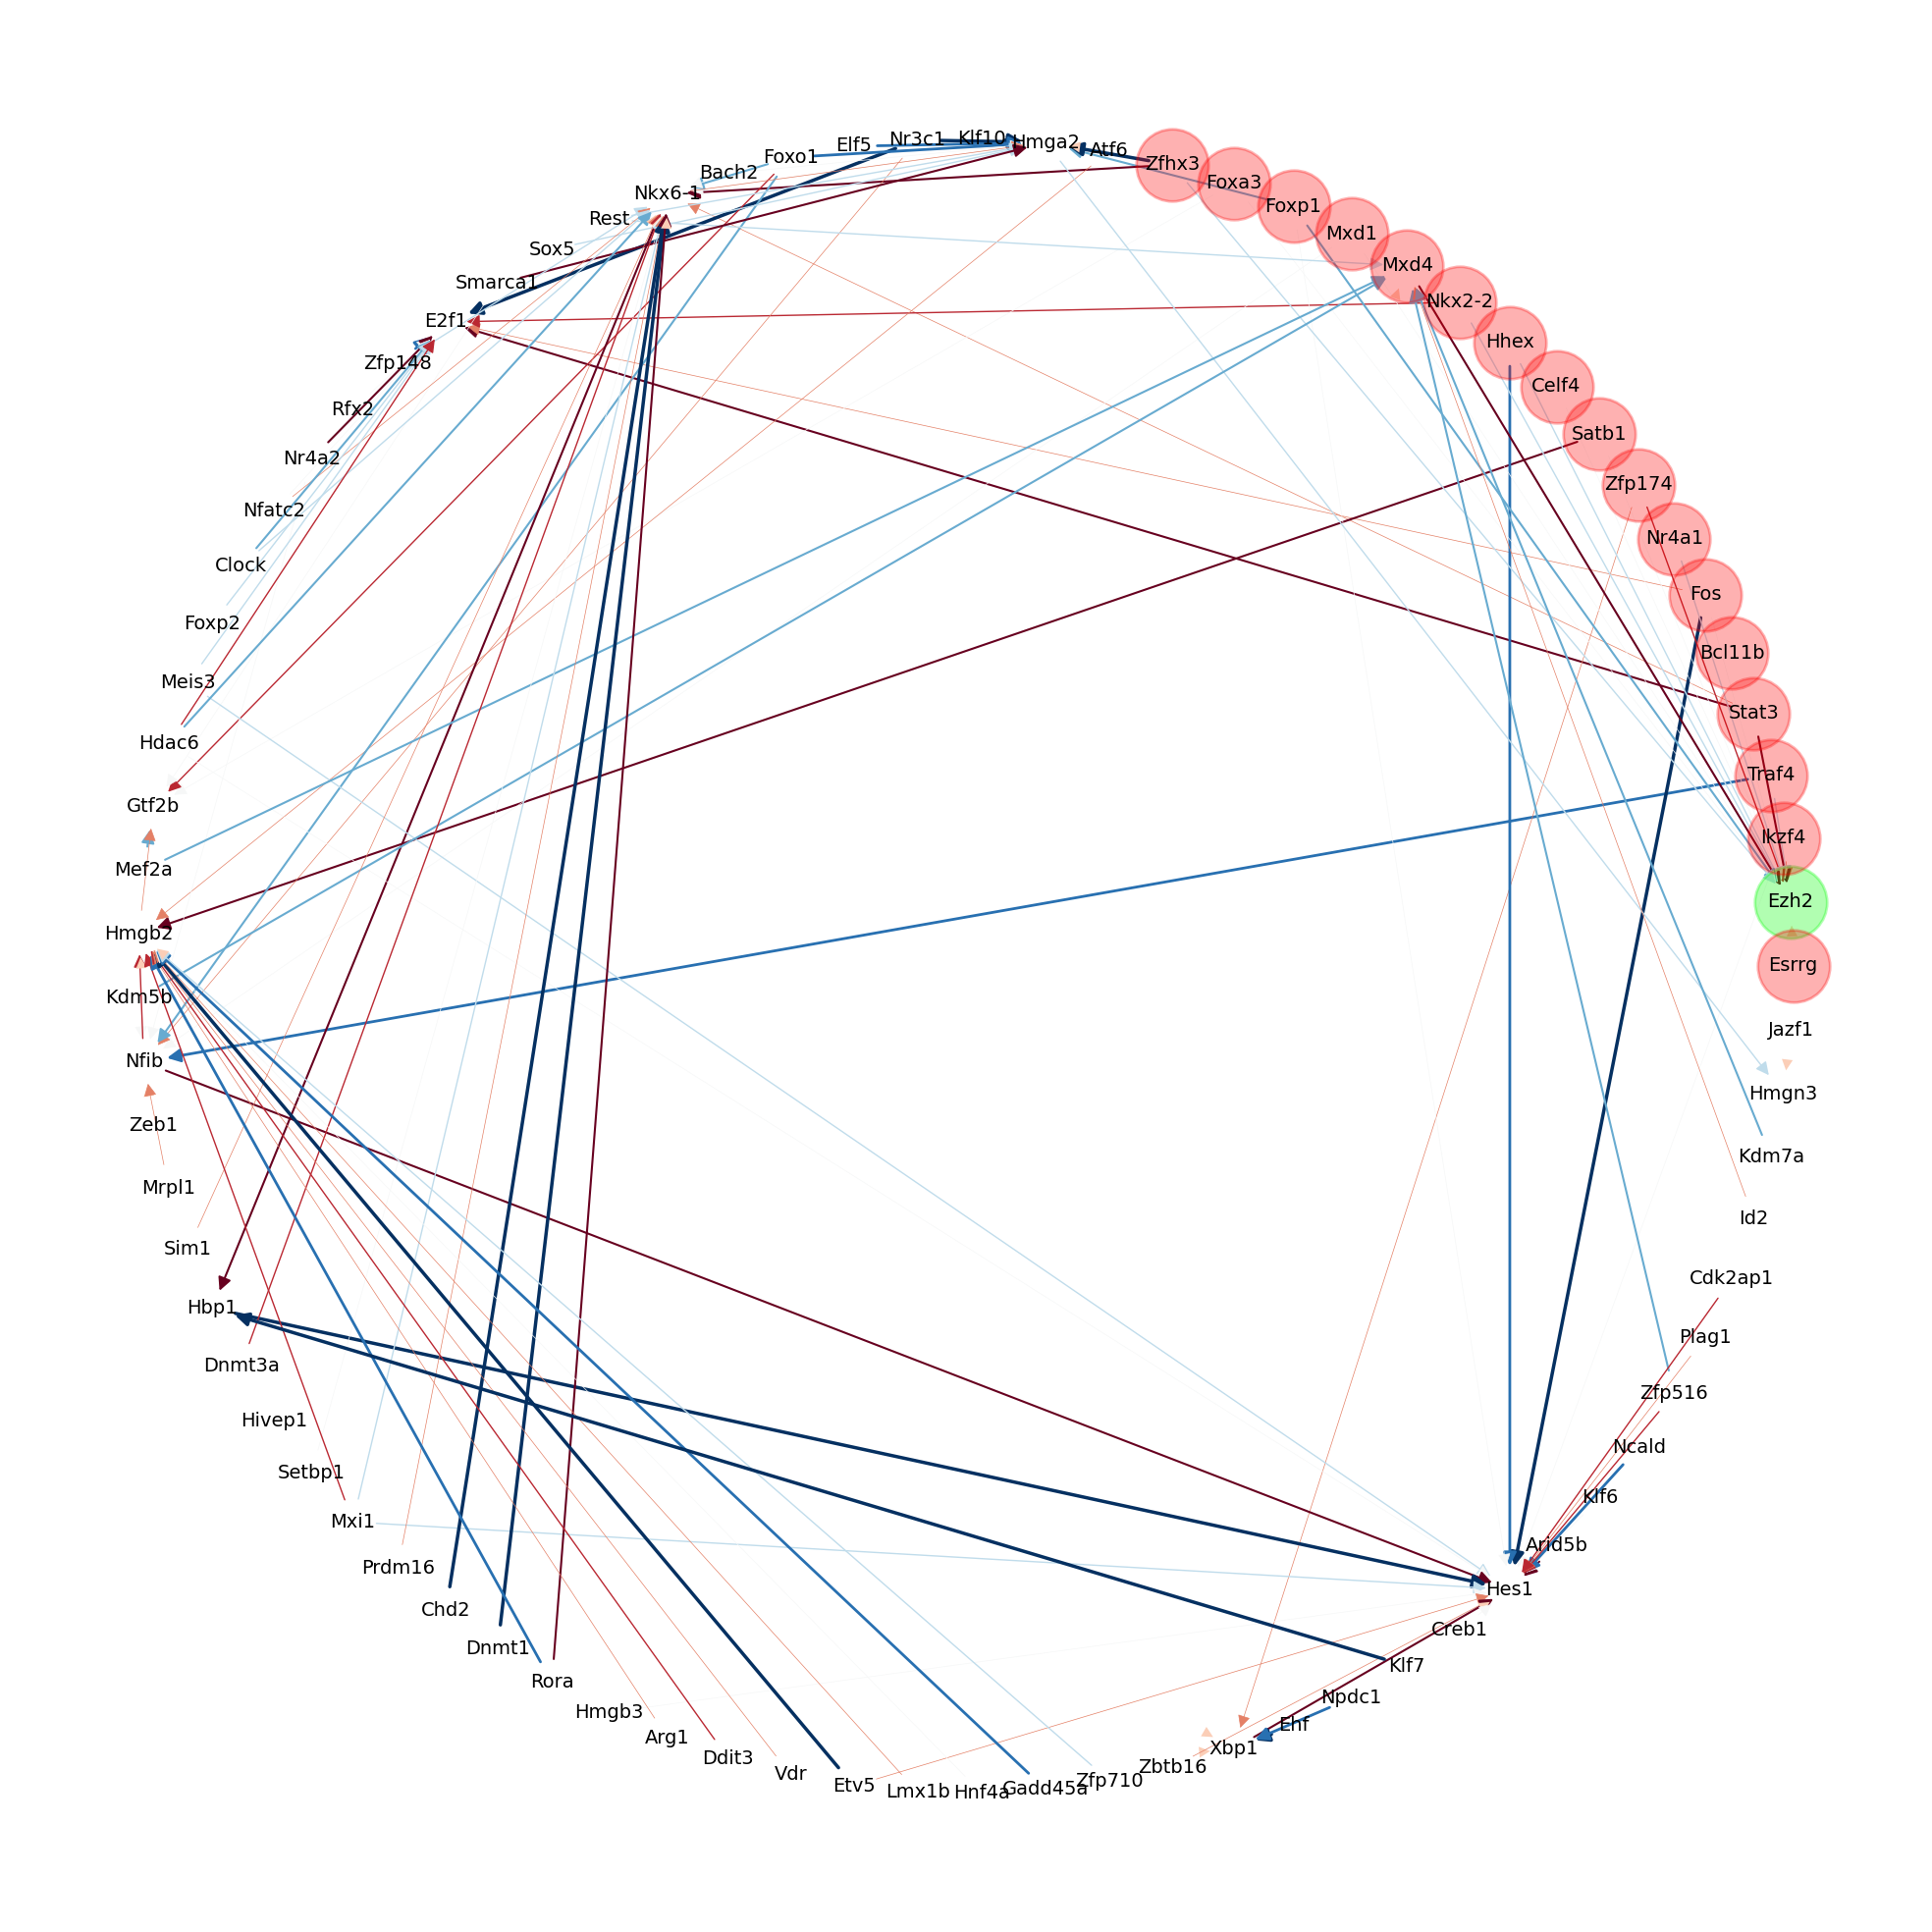

In [29]:
plt.figure(figsize=(10,10))

colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}

pos = nx.circular_layout(DG)

elist = [DG.get_edge_data(u,v)['weight']*25 for (u, v) in DG.edges]
#esmall = [(u, v) for (u, v, d) in DG.edges(data=True) if d["weight"] <= 0.5]

edges,weights = zip(*nx.get_edge_attributes(DG,'weight').items())

# edges
nx.draw_networkx_edges(DG, pos, width=elist, edge_color = weights, edge_cmap=plt.cm.RdBu)

#nodes
nx.draw_networkx_nodes(DG, pos, node_size=700, nodelist = ['Ezh2'], node_color = (0,0.99,0,0.3))

nx.draw_networkx_nodes(DG, pos, node_size=700, nodelist = TFs, node_color = (0.99,0,0,0.3))

# labels
nx.draw_networkx_labels(DG, pos, font_size=7, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.02)
plt.axis("off")
plt.tight_layout()
plt.show()